In [32]:
#libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [33]:
data1 = pd.read_csv('train.csv')
data2 = pd.read_csv('test.csv')

train_df = data1.copy()
test_df = data2.copy()

print("First 3 rows of training data: \n", train_df.head(3))
print("First 3 rows of test data: \n", test_df.head(3))

First 3 rows of training data: 
    id  Time_spent_Alone Stage_fear  Social_event_attendance  Going_outside  \
0   0               0.0         No                      6.0            4.0   
1   1               1.0         No                      7.0            3.0   
2   2               6.0        Yes                      1.0            0.0   

  Drained_after_socializing  Friends_circle_size  Post_frequency Personality  
0                        No                 15.0             5.0   Extrovert  
1                        No                 10.0             8.0   Extrovert  
2                       NaN                  3.0             0.0   Introvert  
First 3 rows of test data: 
       id  Time_spent_Alone Stage_fear  Social_event_attendance  Going_outside  \
0  18524               3.0         No                      7.0            4.0   
1  18525               NaN        Yes                      0.0            0.0   
2  18526               3.0         No                      5.0    

In [34]:
train_df.columns

Index(['id', 'Time_spent_Alone', 'Stage_fear', 'Social_event_attendance',
       'Going_outside', 'Drained_after_socializing', 'Friends_circle_size',
       'Post_frequency', 'Personality'],
      dtype='object')

In [35]:
train_df.shape, test_df.shape

((18524, 9), (6175, 8))

In [36]:
train_df.isnull().sum()

id                              0
Time_spent_Alone             1190
Stage_fear                   1893
Social_event_attendance      1180
Going_outside                1466
Drained_after_socializing    1149
Friends_circle_size          1054
Post_frequency               1264
Personality                     0
dtype: int64

In [37]:
test_df.isnull().sum()

id                             0
Time_spent_Alone             425
Stage_fear                   598
Social_event_attendance      397
Going_outside                466
Drained_after_socializing    432
Friends_circle_size          350
Post_frequency               408
dtype: int64

In [38]:
train_df = train_df.dropna()
test_df = test_df.dropna()

In [39]:
train_df['Stage_fear'].value_counts(), train_df['Drained_after_socializing'].value_counts(), train_df['Personality'].value_counts()

(Stage_fear
 No     8488
 Yes    1701
 Name: count, dtype: int64,
 Drained_after_socializing
 No     8487
 Yes    1702
 Name: count, dtype: int64,
 Personality
 Extrovert    8422
 Introvert    1767
 Name: count, dtype: int64)

In [40]:
from sklearn.preprocessing import LabelEncoder

le_fear = LabelEncoder().fit(train_df['Stage_fear'])
le_drain = LabelEncoder().fit(train_df['Drained_after_socializing'])
le_personality = LabelEncoder().fit(train_df['Personality'])

train_df['Stage_fear'] = le_fear.transform(train_df['Stage_fear'])
train_df['Drained_after_socializing'] = le_drain.transform(train_df['Drained_after_socializing'])
train_df['Personality'] = le_personality.transform(train_df['Personality'])

test_df['Stage_fear'] = le_fear.transform(test_df['Stage_fear'])
test_df['Drained_after_socializing'] = le_drain.transform(test_df['Drained_after_socializing'])

In [41]:
train_df

,id,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,0,0.0,0,6.0,4.0,0,15.0,5.0,0
1,1,1.0,0,7.0,3.0,0,10.0,8.0,0
3,3,3.0,0,7.0,3.0,0,11.0,5.0,0
7,7,2.0,0,8.0,3.0,0,4.0,5.0,0
9,9,1.0,0,8.0,6.0,0,14.0,9.0,0
...,...,...,...,...,...,...,...,...,...
18509,18509,1.0,0,3.0,4.0,0,15.0,4.0,0
18511,18511,0.0,0,4.0,5.0,0,11.0,4.0,0
18514,18514,6.0,0,5.0,3.0,0,10.0,4.0,0
18519,18519,3.0,0,7.0,3.0,0,9.0,7.0,0


In [42]:
distribution_fear = train_df['Stage_fear'].value_counts()
distribution_fear = distribution_fear.reset_index()

distribution_social = train_df['Drained_after_socializing'].value_counts()
distribution_social = distribution_social.reset_index()

distribution_personality = train_df['Personality'].value_counts()
distribution_personality = distribution_personality.reset_index()

In [43]:
distribution_personality

,Personality,count
0,0,8422
1,1,1767


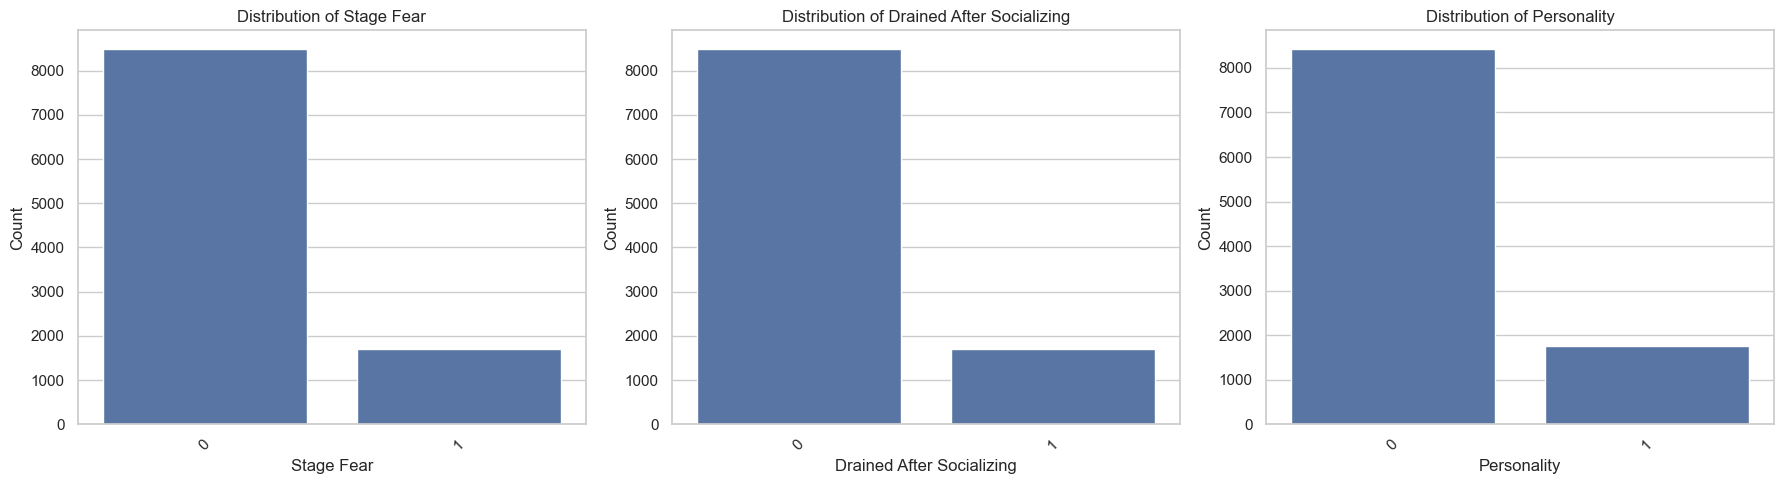

In [44]:
sns.set(style='whitegrid')

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.barplot(ax=axes[0], x='Stage_fear', y='count', data=distribution_fear)
axes[0].set_title('Distribution of Stage Fear')
axes[0].set_xlabel('Stage Fear')
axes[0].set_ylabel('Count')
axes[0].tick_params(axis='x', rotation=45)

sns.barplot(ax=axes[1], x='Drained_after_socializing', y='count', data=distribution_social)
axes[1].set_title('Distribution of Drained After Socializing')
axes[1].set_xlabel('Drained After Socializing')
axes[1].set_ylabel('Count')
axes[1].tick_params(axis='x', rotation=45)

sns.barplot(ax=axes[2], x='Personality', y='count', data=distribution_personality)
axes[2].set_title('Distribution of Personality')
axes[2].set_xlabel('Personality')
axes[2].set_ylabel('Count')
axes[2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

## SMOTENC

SMOTENC is a better candidate than SMOTE because the features to be resampled are categorical.

SMOTE doesn't take into consideration the relationship between features but only considers that distance between data points as per K-means points.

In [45]:
from sklearn.model_selection import train_test_split

X = train_df.drop(columns='Personality')
y = train_df['Personality']

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify= y, test_size= 0.2, random_state=42)

In [46]:
from imblearn.over_sampling import SMOTENC

cat_features_idx = [X_train.columns.get_loc(col) for col in ['Stage_fear', 'Drained_after_socializing']]

smote_nc = SMOTENC(categorical_features=cat_features_idx, random_state=42)

X_resampled, y_resampled = smote_nc.fit_resample(X_train.values, y_train.values)

In [47]:
X_resampled_df = pd.DataFrame(X_resampled, columns=X_train.columns)
y_resampled_df = pd.Series(y_resampled, name='Personality')

train_df_resampled = pd.concat([X_resampled_df, y_resampled_df], axis= 1)

In [48]:
distribution_fear = train_df_resampled['Stage_fear'].value_counts()
distribution_fear = distribution_fear.reset_index()

distribution_social = train_df_resampled['Drained_after_socializing'].value_counts()
distribution_social = distribution_social.reset_index()

distribution_personality = train_df_resampled['Personality'].value_counts()
distribution_personality = distribution_personality.reset_index()

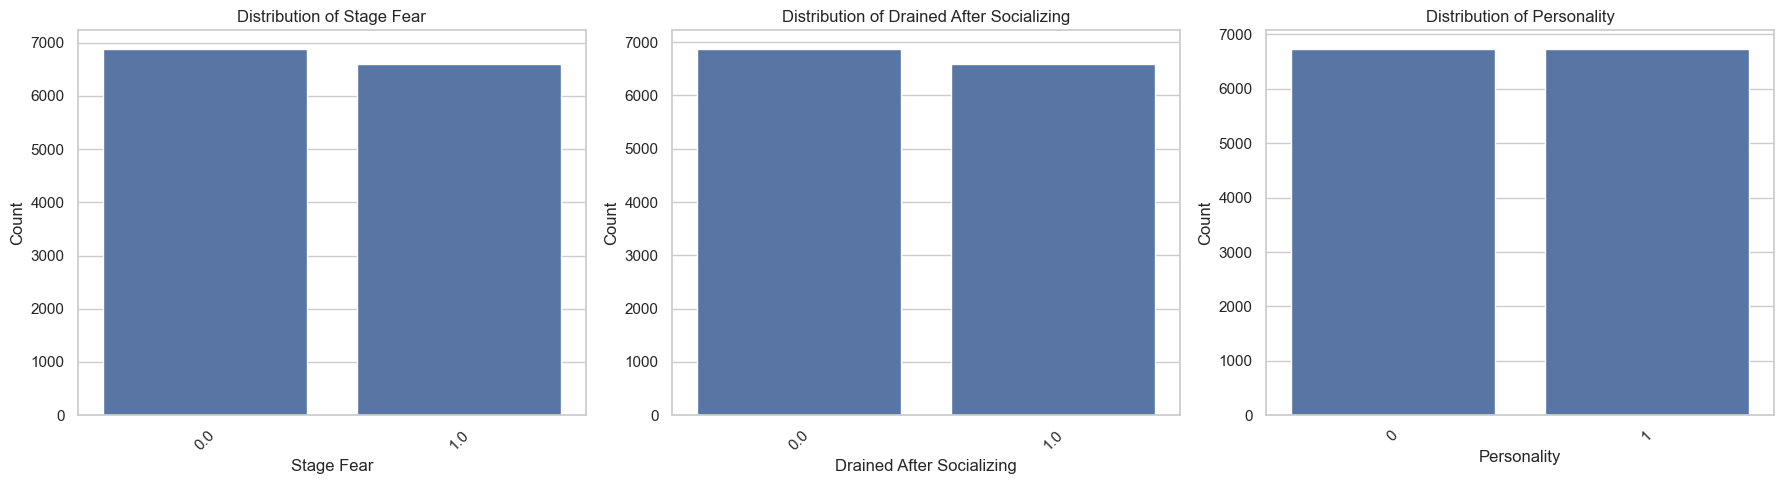

In [49]:
sns.set(style='whitegrid')

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.barplot(ax=axes[0], x='Stage_fear', y='count', data=distribution_fear)
axes[0].set_title('Distribution of Stage Fear')
axes[0].set_xlabel('Stage Fear')
axes[0].set_ylabel('Count')
axes[0].tick_params(axis='x', rotation=45)

sns.barplot(ax=axes[1], x='Drained_after_socializing', y='count', data=distribution_social)
axes[1].set_title('Distribution of Drained After Socializing')
axes[1].set_xlabel('Drained After Socializing')
axes[1].set_ylabel('Count')
axes[1].tick_params(axis='x', rotation=45)

sns.barplot(ax=axes[2], x='Personality', y='count', data=distribution_personality)
axes[2].set_title('Distribution of Personality')
axes[2].set_xlabel('Personality')
axes[2].set_ylabel('Count')
axes[2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

In [50]:
train_df_resampled.shape

(13474, 9)

In [51]:
num = train_df_resampled.select_dtypes(include='number')
cat = train_df_resampled.select_dtypes(exclude='number')

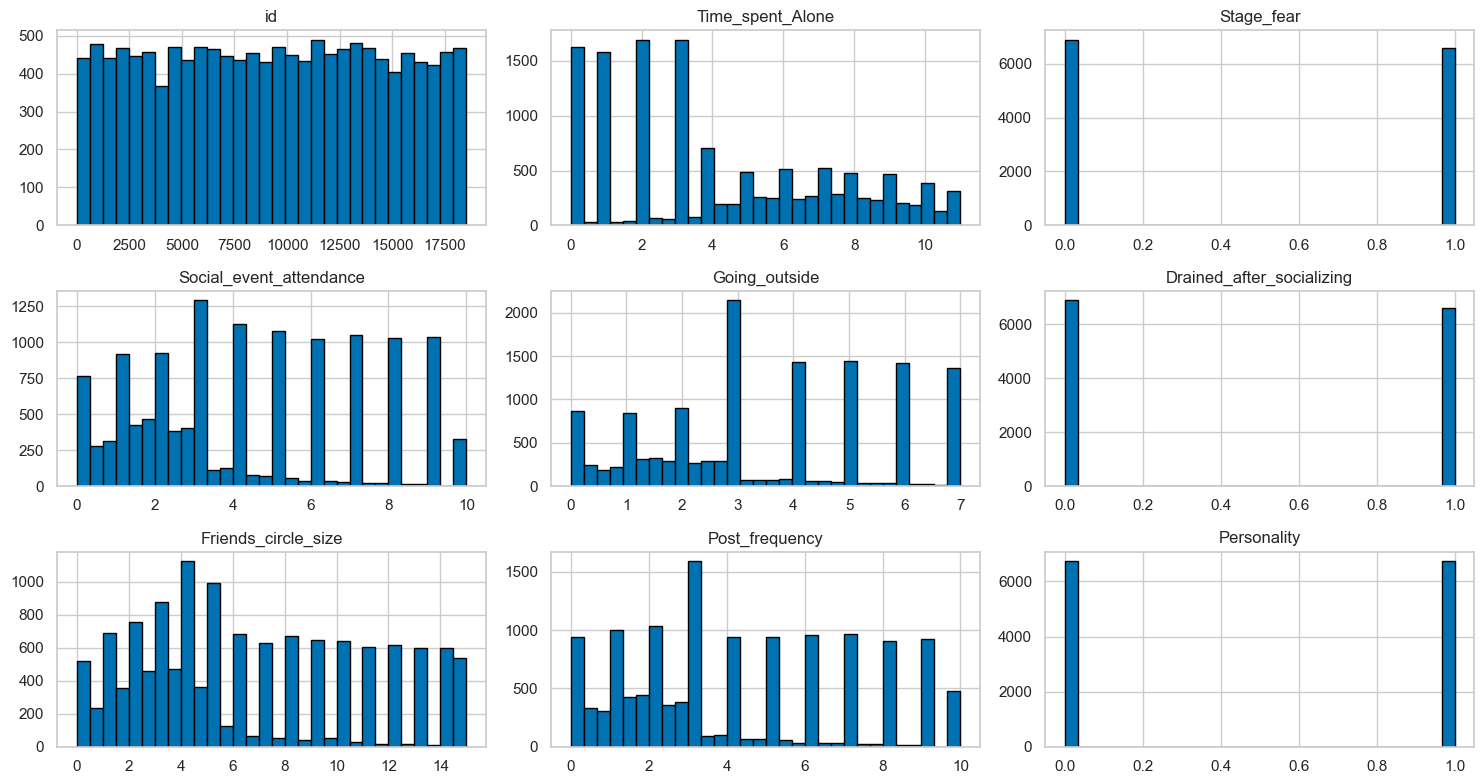

In [52]:
#plot numerical features

color = '#0072B2'

# grid size
nrows, ncols = 3, 3

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 8))

axes = axes.flatten()

# Plot each numerical feature
for i, ax in enumerate(axes):
    if i >= len(num.columns):
        ax.set_visible(False)  # hide unesed plots
        continue
    ax.hist(num.iloc[:, i], bins=30, color=color, edgecolor='black')
    ax.set_title(num.columns[i])

plt.tight_layout()
plt.show()


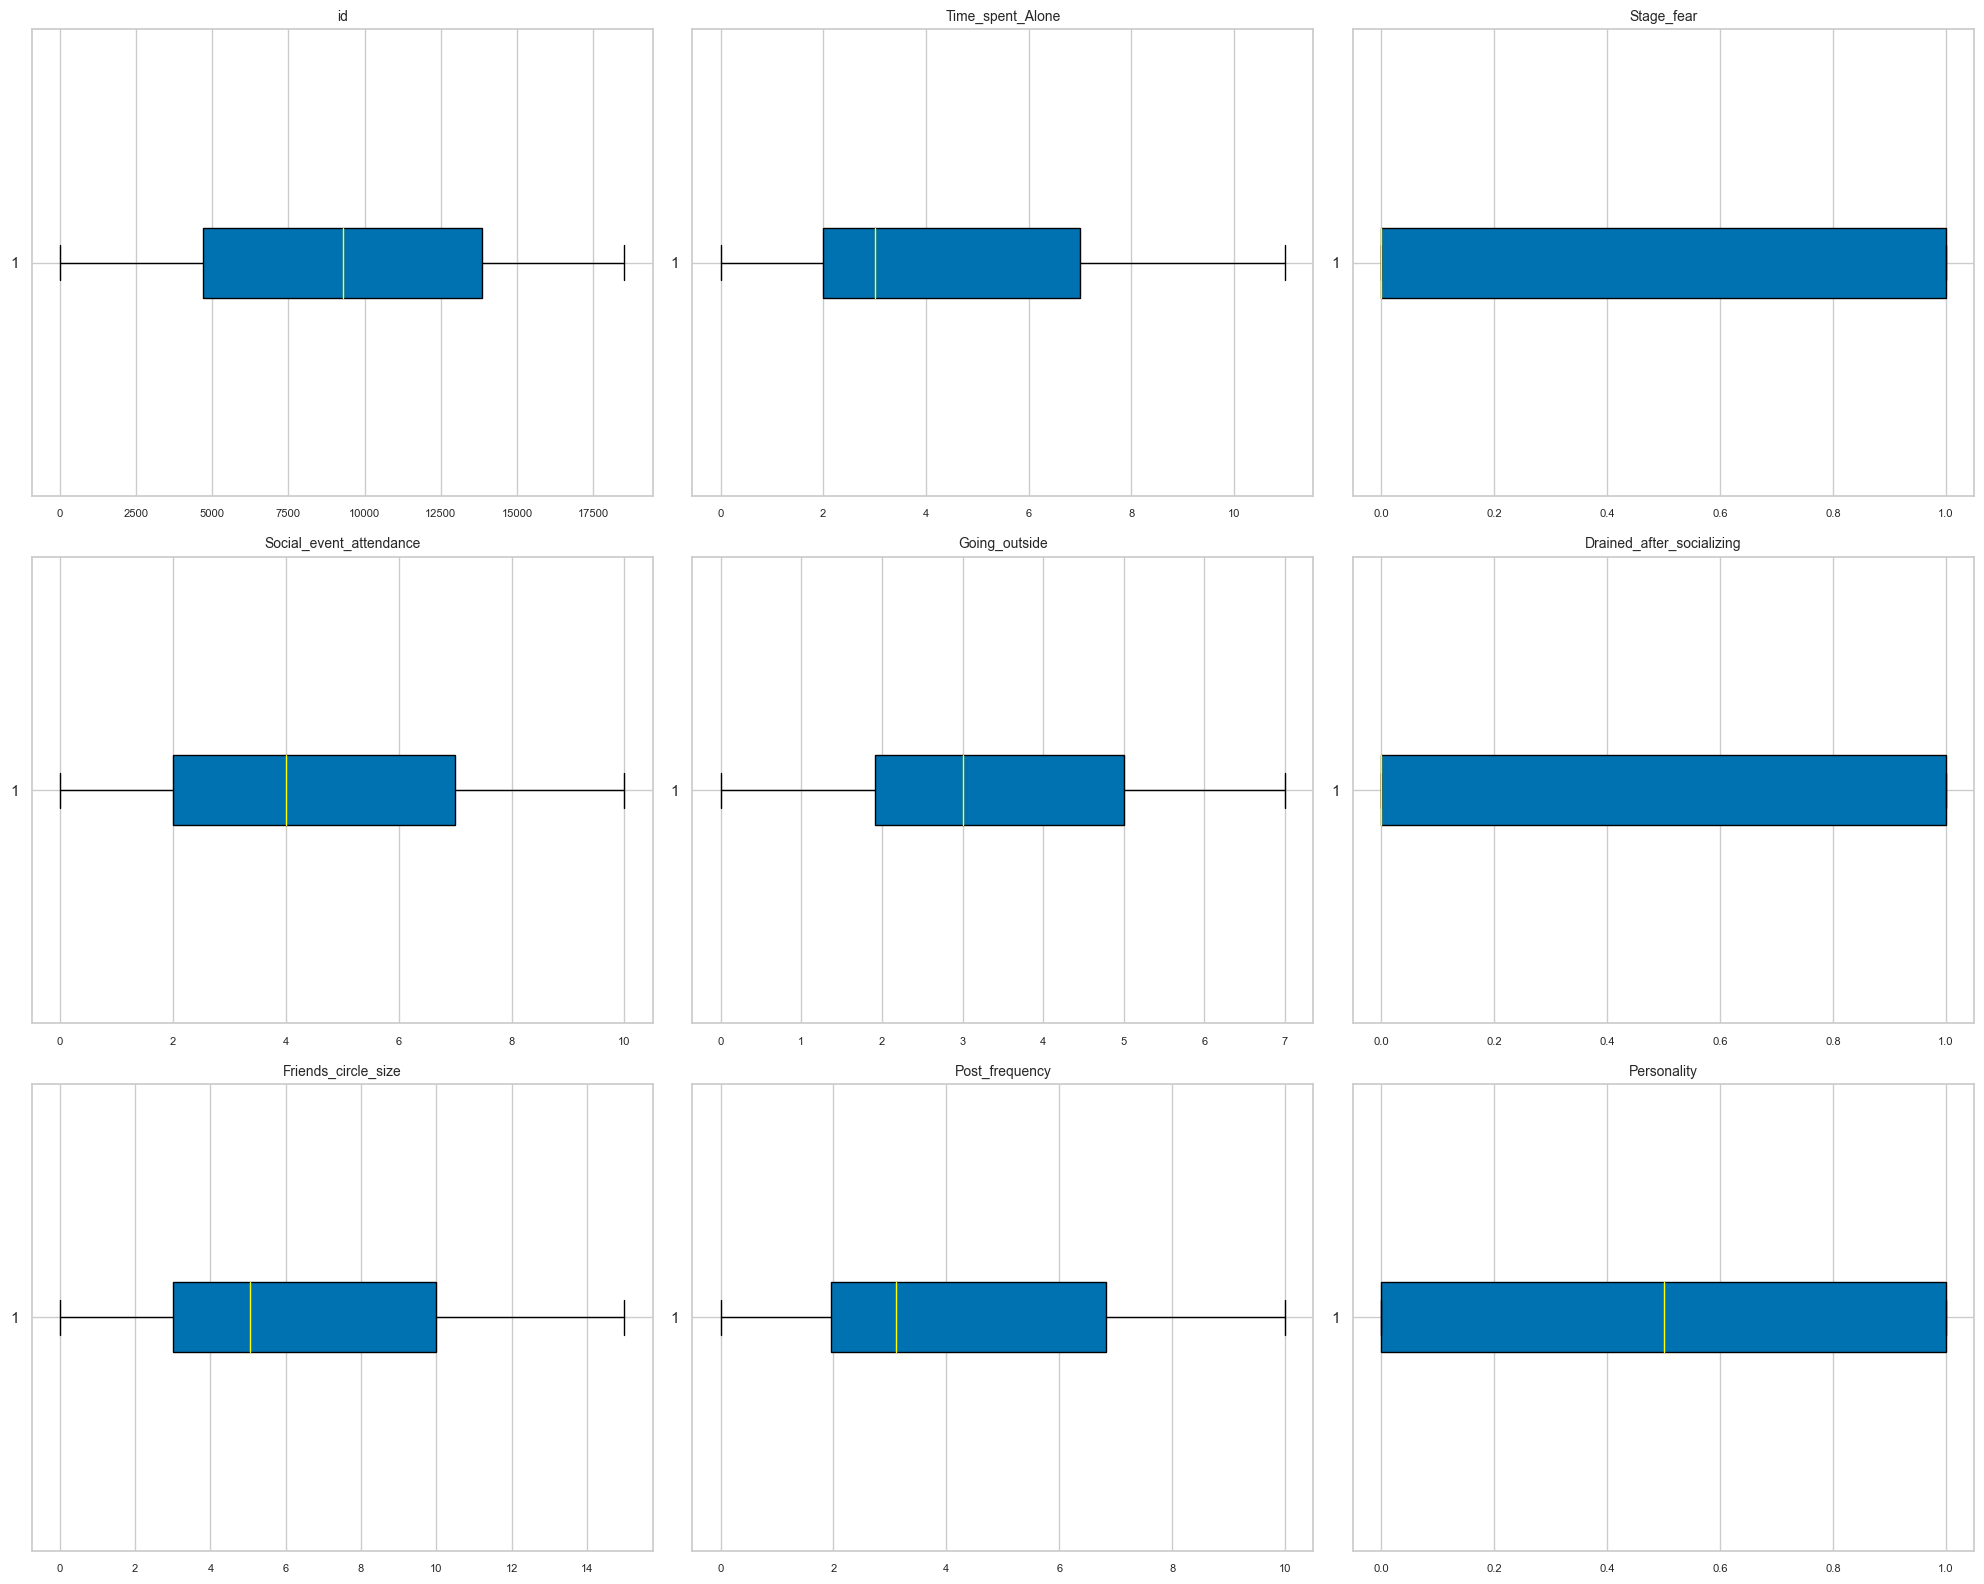

In [53]:
#boxplot numerical features

color = '#0072B2'

# grid size
nrows, ncols = 3, 3 

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 16))

axes = axes.flatten()

for i, ax in enumerate(axes):
    if i >= len(num.columns):
        ax.set_visible(False)
        continue
    ax.boxplot(num.iloc[:, i].dropna(), vert=False, patch_artist=True, 
               boxprops=dict(facecolor=color, color='black'), 
               medianprops=dict(color='yellow'), whiskerprops=dict(color='black'), 
               capprops=dict(color='black'), flierprops=dict(marker='o', color='red', markersize=5))
    ax.set_title(num.columns[i], fontsize=10)
    ax.tick_params(axis='x', labelsize=8)

plt.tight_layout()
plt.show()


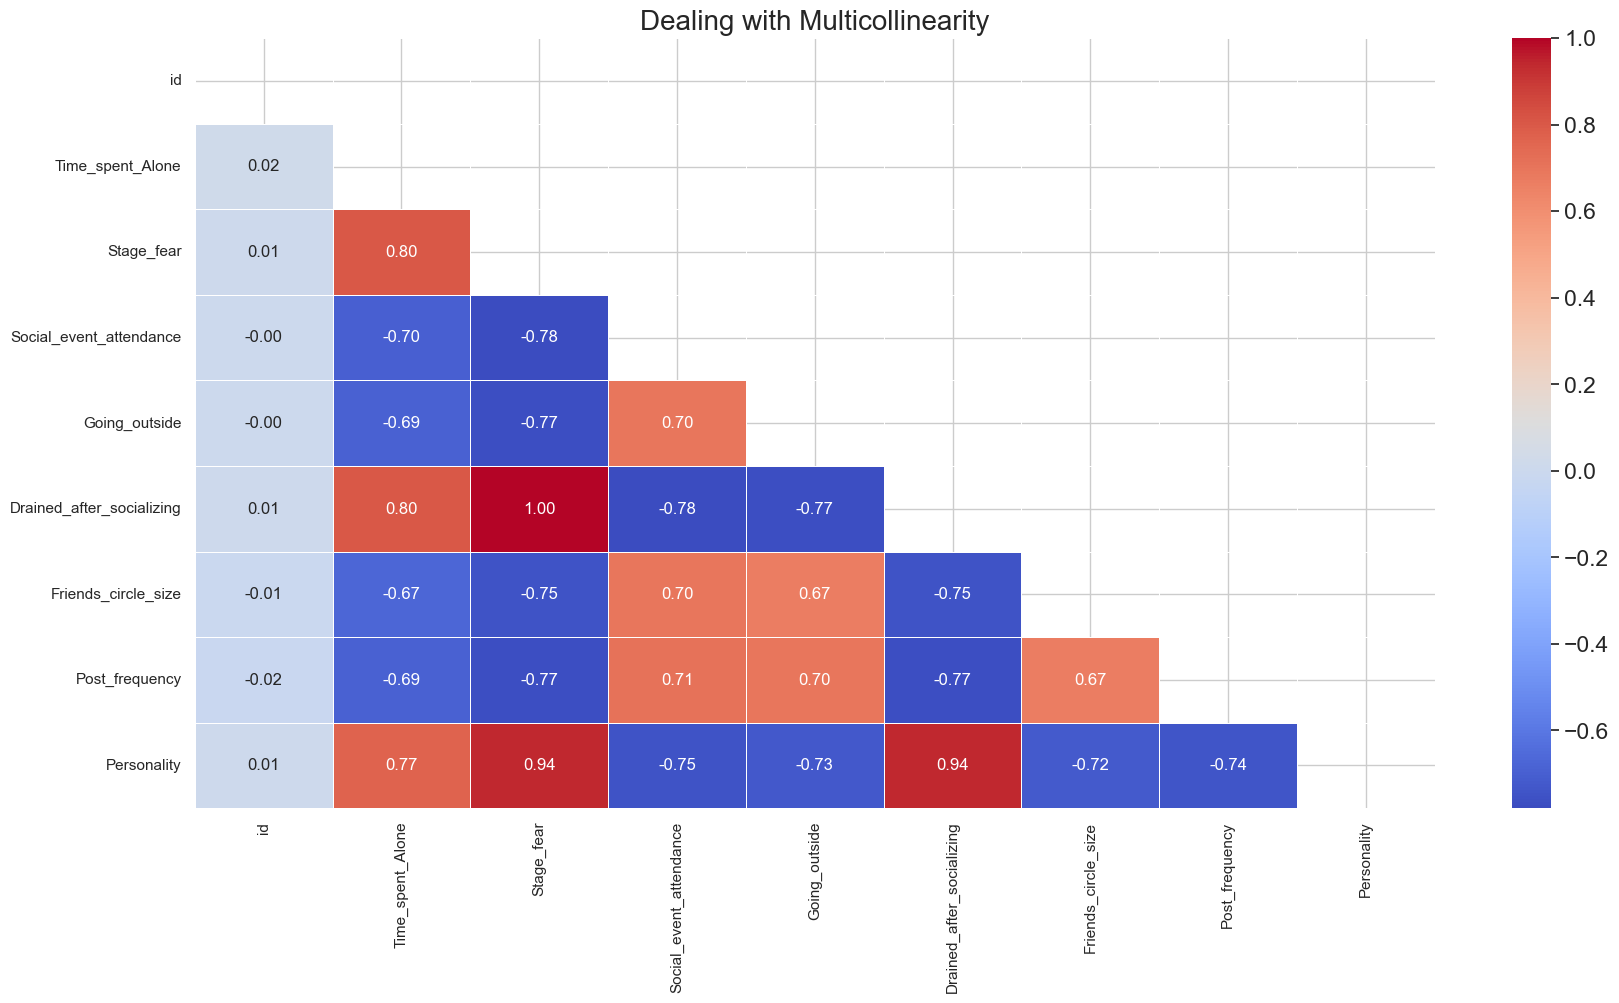

In [54]:
num_corr = round(train_df_resampled.corr(method='spearman'), 2)

# Correlation Matrix-Heatmap Plot
mask = np.zeros_like(num_corr)
mask[np.triu_indices_from(mask)] = True # optional, to hide repeat half of the matrix

f, ax = plt.subplots(figsize=(20, 10))
sns.set_theme(font_scale=1.5) # increase font size

ax = sns.heatmap(num_corr, mask=mask, annot=True, annot_kws={"size": 12}, linewidths=.5, cmap="coolwarm", fmt=".2f", ax=ax) # round to 2 decimal places
ax.set_title("Dealing with Multicollinearity", fontsize=20) # add title
plt.show()


In [55]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

features = train_df_resampled.drop(columns=['id', 'Personality'])

X = add_constant(features)

vif_data = pd.DataFrame()
vif_data['Feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)

                     Feature         VIF
0                      const   37.490422
1           Time_spent_Alone    2.893345
2                 Stage_fear  147.264517
3    Social_event_attendance    2.680851
4              Going_outside    2.507626
5  Drained_after_socializing  148.033853
6        Friends_circle_size    2.286735
7             Post_frequency    2.435724
